In [1]:
import os
import shutil

# Source folder path and destination folder path to copy
original_folder = '/data/ephemeral/home/dataset'
copied_folder = '/data/ephemeral/home/dataset_nnunet'

# Copy the entire source folder to the destination folder
if not os.path.exists(copied_folder):  # Copy only if the destination folder does not exist
    shutil.copytree(original_folder, copied_folder)
    print(f"{original_folder} was successfully copied to {copied_folder}.")

# Original parent folder paths containing files to copy
base_folders = [
    '/data/ephemeral/home/dataset/train/DCM',
    '/data/ephemeral/home/dataset/train/outputs_json',
    '/data/ephemeral/home/dataset/test/DCM'
]

# Destination parent folder paths to copy files to
destination_folders = [
    '/data/ephemeral/home/dataset_nnunet/train/images',
    '/data/ephemeral/home/dataset_nnunet/train/labels',
    '/data/ephemeral/home/dataset_nnunet/test'
]

# Create destination folder (ignore if it already exists)
for destination_folder in destination_folders:
    os.makedirs(destination_folder, exist_ok=True)

# Repeat for each pair of source and destination folders
for base_folder, destination_folder in zip(base_folders, destination_folders):
    # Search all subfolders within the original parent folder
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        # Check if it is a folder
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                # Check if it is a file
                if os.path.isfile(file_path):
                    # Maintain the original file name
                    new_file_path = os.path.join(destination_folder, file_name)
                    # Copy the file
                    shutil.copy2(file_path, new_file_path)


shutil.rmtree('/data/ephemeral/home/dataset_nnunet/test/DCM')
shutil.rmtree('/data/ephemeral/home/dataset_nnunet/train/DCM')
shutil.rmtree('/data/ephemeral/home/dataset_nnunet/train/outputs_json')


/data/ephemeral/home/dataset was successfully copied to /data/ephemeral/home/dataset_nnunet.


In [5]:
import os
import re
import numpy as np
import SimpleITK as sitk
from PIL import Image

# 입력 폴더 및 출력 설정
input_folder = "/data/ephemeral/home/dataset_nnunet/train/images"  # 이미지가 포함된 폴더
output_folder_path = "/data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr"  # NIfTI 파일을 저장할 폴더
output_nifti_filename_prefix = "HandBone"  # 출력 파일 기본 이름

# 이미지 크기 설정 (2048x2048로 리사이즈)
TARGET_SIZE = (2048, 2048)

# 자연 정렬 함수 (숫자가 포함된 파일 이름을 올바르게 정렬)
def natural_sort_key(string):
    """
    자연 정렬을 위한 키 생성 함수.
    """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', string)]

# Step 1: Load and strictly sort images
def load_and_sort_images(input_folder):
    """
    폴더에서 PNG 이미지를 로드하고 정렬.
    """
    png_files = [f for f in os.listdir(input_folder) if f.lower().endswith(".png")]
    sorted_files = sorted(png_files, key=natural_sort_key)
    print(f"정렬된 이미지: {sorted_files}")
    return sorted_files

# Step 2: Resize images to a consistent size
def resize_image(image, target_size):
    """
    PIL 이미지를 지정된 크기로 리사이즈.
    """
    return image.resize(target_size, Image.ANTIALIAS)

# Step 3: Save each image as an individual NIfTI file
def save_images_as_nifti_slices(input_folder, sorted_files, output_folder, output_filename_prefix, target_size, spacing=(1.0, 1.0, 1.0)):
    """
    각 이미지를 개별 NIfTI 파일로 저장.
    """
    for index, filename in enumerate(sorted_files):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert('L')  # 그레이스케일로 변환
        img_resized = resize_image(img, target_size)  # 크기 통일
        img_np = np.array(img_resized, dtype=np.uint8)  # NumPy 배열로 변환

        # Depth 축 추가 (1, Height, Width)
        img_np_3d = np.expand_dims(img_np, axis=0)  # Shape: (1, 2048, 2048)

        # NIfTI 파일로 변환 및 저장
        sitk_image = sitk.GetImageFromArray(img_np_3d)  # NumPy 배열을 SimpleITK 이미지로 변환
        sitk_image.SetSpacing(spacing)  # Spacing 설정

        # 파일 이름 지정 (HandBone_000.nii.gz 형식)
        output_path = os.path.join(output_folder, f"case_{index:04d}_0000.nii.gz")
        sitk.WriteImage(sitk_image, output_path)
        print(f"{filename} -> {output_path} 저장 완료")

# Main script
if __name__ == "__main__":
    # 폴더 내 정렬된 이미지 가져오기
    sorted_files = load_and_sort_images(input_folder)

    # 각 이미지를 개별 NIfTI 파일로 저장
    save_images_as_nifti_slices(input_folder, sorted_files, output_folder_path, output_nifti_filename_prefix, TARGET_SIZE)


정렬된 이미지: ['image1661130828152_R.png', 'image1661130891365_L.png', 'image1661144206667.png', 'image1661144246917.png', 'image1661144310162.png', 'image1661144351691.png', 'image1661144691792.png', 'image1661144724044.png', 'image1661144825412.png', 'image1661144852117.png', 'image1661145075929.png', 'image1661145103549.png', 'image1661145193855.png', 'image1661145229731.png', 'image1661145286692.png', 'image1661145313061.png', 'image1661145407161.png', 'image1661145432967.png', 'image1661145563354.png', 'image1661145591320.png', 'image1661146664360.png', 'image1661146685158.png', 'image1661147072358.png', 'image1661147098202.png', 'image1661216747360.png', 'image1661216788592.png', 'image1661216876670.png', 'image1661216907060.png', 'image1661216971933.png', 'image1661216998230.png', 'image1661217116456.png', 'image1661217144265.png', 'image1661217260585.png', 'image1661217290462.png', 'image1661218865003.png', 'image1661218881444.png', 'image1661219523078.png', 'image1661219796151.png'

/tmp/ipykernel_8805/2062848473.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize(target_size, Image.ANTIALIAS)


image1661130891365_L.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0001_0000.nii.gz 저장 완료
image1661144206667.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0002_0000.nii.gz 저장 완료
image1661144246917.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0003_0000.nii.gz 저장 완료
image1661144310162.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0004_0000.nii.gz 저장 완료
image1661144351691.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0005_0000.nii.gz 저장 완료
image1661144691792.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0006_0000.nii.gz 저장 완료
image1661144724044.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0007_0000.nii.gz 저장 완료
image1661144825412.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0008_0000.nii.gz 저장 완료
image1661144852117.png -> /data/ephemeral/home/nnUNet_raw_data

In [7]:
import os
import re
import numpy as np
import SimpleITK as sitk
from PIL import Image

# 입력 폴더 및 출력 설정
input_folder = "/data/ephemeral/home/dataset_nnunet/test"  # 이미지가 포함된 폴더
output_folder_path = "/data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs"  # NIfTI 파일을 저장할 폴더
output_nifti_filename_prefix = "test"  # 출력 파일 기본 이름

# 이미지 크기 설정 (2048x2048로 리사이즈)
TARGET_SIZE = (2048, 2048)

# 자연 정렬 함수 (숫자가 포함된 파일 이름을 올바르게 정렬)
def natural_sort_key(string):
    """
    자연 정렬을 위한 키 생성 함수.
    """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', string)]

# Step 1: Load and strictly sort images
def load_and_sort_images(input_folder):
    """
    폴더에서 PNG 이미지를 로드하고 정렬.
    """
    png_files = [f for f in os.listdir(input_folder) if f.lower().endswith(".png")]
    sorted_files = sorted(png_files, key=natural_sort_key)
    print(f"정렬된 이미지: {sorted_files}")
    return sorted_files

# Step 2: Resize images to a consistent size
def resize_image(image, target_size):
    """
    PIL 이미지를 지정된 크기로 리사이즈.
    """
    return image.resize(target_size, Image.ANTIALIAS)

# Step 3: Save each image as an individual NIfTI file
def save_images_as_nifti_slices(input_folder, sorted_files, output_folder, output_filename_prefix, target_size, spacing=(1.0, 1.0, 1.0)):
    """
    각 이미지를 개별 NIfTI 파일로 저장.
    """
    for index, filename in enumerate(sorted_files):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path).convert('L')  # 그레이스케일로 변환
        img_resized = resize_image(img, target_size)  # 크기 통일
        img_np = np.array(img_resized, dtype=np.uint8)  # NumPy 배열로 변환

        # Depth 축 추가 (1, Height, Width)
        img_np_3d = np.expand_dims(img_np, axis=0)  # Shape: (1, 2048, 2048)

        # NIfTI 파일로 변환 및 저장
        sitk_image = sitk.GetImageFromArray(img_np_3d)  # NumPy 배열을 SimpleITK 이미지로 변환
        sitk_image.SetSpacing(spacing)  # Spacing 설정

        # 파일 이름 지정 (HandBone_000.nii.gz 형식)
        output_path = os.path.join(output_folder, f"case_{index:04d}.nii.gz")
        sitk.WriteImage(sitk_image, output_path)
        print(f"{filename} -> {output_path} 저장 완료")

# Main script
if __name__ == "__main__":
    # 폴더 내 정렬된 이미지 가져오기
    sorted_files = load_and_sort_images(input_folder)

    # 각 이미지를 개별 NIfTI 파일로 저장
    save_images_as_nifti_slices(input_folder, sorted_files, output_folder_path, output_nifti_filename_prefix, TARGET_SIZE)


정렬된 이미지: ['image1661319116107.png', 'image1661319145363.png', 'image1661319356239.png', 'image1661319390106.png', 'image1661320372752.png', 'image1661320397148.png', 'image1661320538919.png', 'image1661320557045.png', 'image1661320671343.png', 'image1661320722689.png', 'image1661320864475.png', 'image1661320892395.png', 'image1661320944318.png', 'image1661320972355.png', 'image1661389291522.png', 'image1661389310383.png', 'image1661389524954.png', 'image1661389553713.png', 'image1661389595277.png', 'image1661389621012.png', 'image1661735854451.png', 'image1661735882043.png', 'image1662340967509.png', 'image1662340984526.png', 'image1662341048902.png', 'image1662341087474.png', 'image1662341167750.png', 'image1662341205574.png', 'image1662341263517.png', 'image1662341292950.png', 'image1662341360854.png', 'image1662341377096.png', 'image1662341616527.png', 'image1662341653233.png', 'image1662341848883.png', 'image1662341889065.png', 'image1662342205281.png', 'image1662342232684.png', 'i

/tmp/ipykernel_8805/1419952605.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize(target_size, Image.ANTIALIAS)


image1661319145363.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0001.nii.gz 저장 완료
image1661319356239.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0002.nii.gz 저장 완료
image1661319390106.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0003.nii.gz 저장 완료
image1661320372752.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0004.nii.gz 저장 완료
image1661320397148.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0005.nii.gz 저장 완료
image1661320538919.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0006.nii.gz 저장 완료
image1661320557045.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0007.nii.gz 저장 완료
image1661320671343.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0008.nii.gz 저장 완료
image1661320722689.png -> /data/ephemeral/home/nnUNet_raw_data/Task001_HandBone/imagesTs/case_0009.nii.g

In [ ]:
import os
import re
import json
import numpy as np
from PIL import Image, ImageDraw
import SimpleITK as sitk

# JSON 및 출력 경로 설정
json_folder = "/data/ephemeral/home/dataset_nnunet/train/labels"  # JSON 파일이 저장된 폴더
output_base_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr"  # NIfTI 파일 출력 경로
IMAGE_SIZE = (2048, 2048)  # 마스크 이미지 크기 설정

# 클래스 이름 정의
class_names = [
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Pisiform", "Triquetrum",
    "Radius", "Ulna"
]
class_mapping = {name: idx + 1 for idx, name in enumerate(class_names)}  # 클래스 이름 -> ID 매핑

# 자연 정렬 함수
def natural_sort_key(string):
    """자연 정렬을 위한 키 생성 함수."""
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r"([0-9]+)", string)]

# Step 1: 폴더 생성
def create_folders(base_path):
    os.makedirs(base_path, exist_ok=True)
    print(f"nnUNet 출력 폴더 생성 완료: {base_path}")

# Step 2: JSON 데이터로부터 마스크 생성
def create_mask_from_annotations(annotations, image_size):
    """
    JSON 데이터에서 폴리곤 정보를 읽어와 클래스별 마스크 이미지를 생성.
    """
    mask = np.zeros(image_size, dtype=np.uint8)  # 초기 마스크 (0으로 초기화)
    
    for annotation in annotations:
        points = annotation["points"]
        class_name = annotation["label"]
        class_id = class_mapping.get(class_name, 0)  # 클래스 ID 가져오기, 없으면 0
        
        # points 데이터 정리: 리스트의 리스트로 변환
        if isinstance(points, list) and len(points) > 0:
            if isinstance(points[0], (int, float)):  # 단일 리스트 형태인 경우
                points = [(points[i], points[i + 1]) for i in range(0, len(points), 2)]
            elif isinstance(points[0], list) and len(points[0]) == 2:  # 중첩된 리스트인 경우
                points = [(float(p[0]), float(p[1])) for p in points]
            else:
                raise ValueError("Unsupported points format in annotation.")
            
            # 폴리곤 그리기
            img = Image.new("L", image_size, 0)  # 클래스별 임시 마스크 생성
            draw = ImageDraw.Draw(img)
            draw.polygon(points, outline=class_id, fill=class_id)  # 클래스 ID로 채움
            mask = np.maximum(mask, np.array(img, dtype=np.uint8))  # 클래스 ID 병합
    
    return mask

# Step 3: NIfTI 파일 저장
def save_nifti(image_array, output_path, spacing=(1.0, 1.0, 1.0)):
    """
    NumPy 배열을 NIfTI 파일로 저장.
    """
    # Directly transform (1, H, W) to (H, W, 1)
    if len(image_array.shape) == 3 and image_array.shape[0] == 1:
        image_array = image_array[0, :, :]  # Remove the first dimension
        image_array = np.expand_dims(image_array, axis=-1)  # Add a new last dimension
    
    print(f"Final shape for saving: {image_array.shape}")  # Shape should be (2048, 2048, 1)

    # Save the array as NIfTI
    sitk_image = sitk.GetImageFromArray(image_array)
    sitk_image.SetSpacing(spacing)  # Spacing 설정
    sitk.WriteImage(sitk_image, output_path)
    print(f"NIfTI 파일 저장 완료: {output_path}")




# Step 4: JSON 파일 처리 및 저장
def process_and_sort_json_files(json_folder, output_base_path, image_size):
    # 출력 폴더 생성
    create_folders(output_base_path)
    
    # JSON 파일 리스트 가져오기 및 정렬
    json_files = [f for f in os.listdir(json_folder) if f.endswith(".json")]
    sorted_files = sorted(json_files, key=natural_sort_key)
    print(f"정렬된 JSON 파일: {sorted_files}")
    
    # JSON 파일별로 처리 및 저장
    for idx, json_file in enumerate(sorted_files):
        json_path = os.path.join(json_folder, json_file)
        
        # JSON 파일 로드
        with open(json_path, "r") as f:
            json_data = json.load(f)
        
        # 출력 파일 이름 지정 (case_XXXX_0000.nii.gz 형식)
        output_filename = f"case_{idx:04d}_0000.nii.gz"
        output_path = os.path.join(output_base_path, output_filename)
        
        # 마스크 생성 및 저장
        mask_array = create_mask_from_annotations(json_data["annotations"], image_size)
        save_nifti(mask_array, output_path)
        
        # 변환 완료 메시지
        print(f"{json_file} -> {output_path} 저장 완료")

# Main 실행
if __name__ == "__main__":
    process_and_sort_json_files(
        json_folder=json_folder,
        output_base_path=output_base_path,
        image_size=IMAGE_SIZE,
    )


nnUNet 출력 폴더 생성 완료: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr
정렬된 JSON 파일: ['image1661130828152_R.json', 'image1661130891365_L.json', 'image1661144206667.json', 'image1661144246917.json', 'image1661144310162.json', 'image1661144351691.json', 'image1661144691792.json', 'image1661144724044.json', 'image1661144825412.json', 'image1661144852117.json', 'image1661145075929.json', 'image1661145103549.json', 'image1661145193855.json', 'image1661145229731.json', 'image1661145286692.json', 'image1661145313061.json', 'image1661145407161.json', 'image1661145432967.json', 'image1661145563354.json', 'image1661145591320.json', 'image1661146664360.json', 'image1661146685158.json', 'image1661147072358.json', 'image1661147098202.json', 'image1661216747360.json', 'image1661216788592.json', 'image1661216876670.json', 'image1661216907060.json', 'image1661216971933.json', 'image1661216998230.json', 'image1661217116456.json', 'image1661217144265.json', 'image16612172

KeyboardInterrupt: 

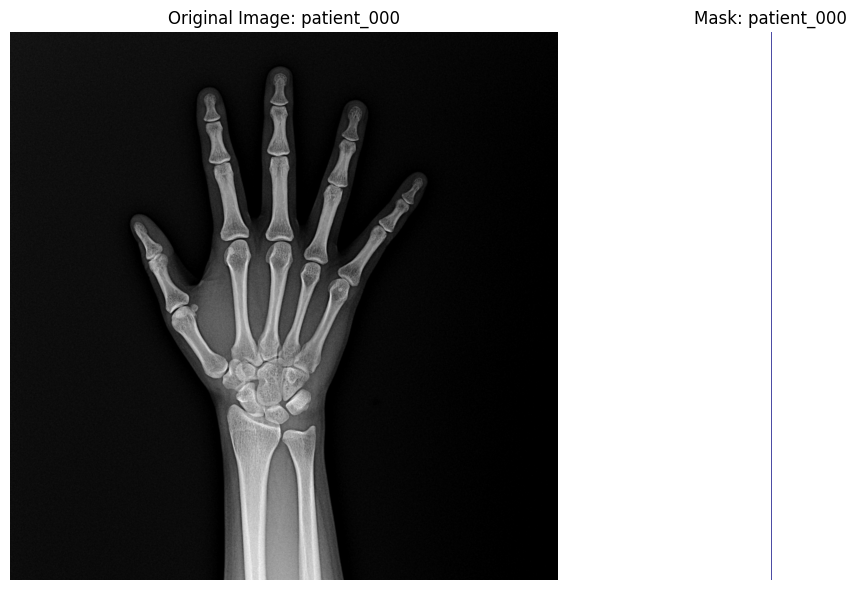

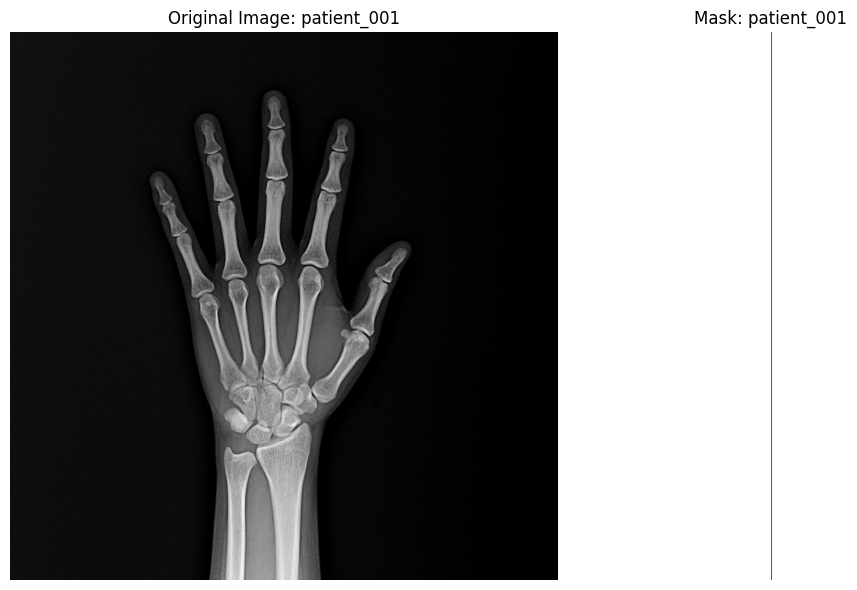

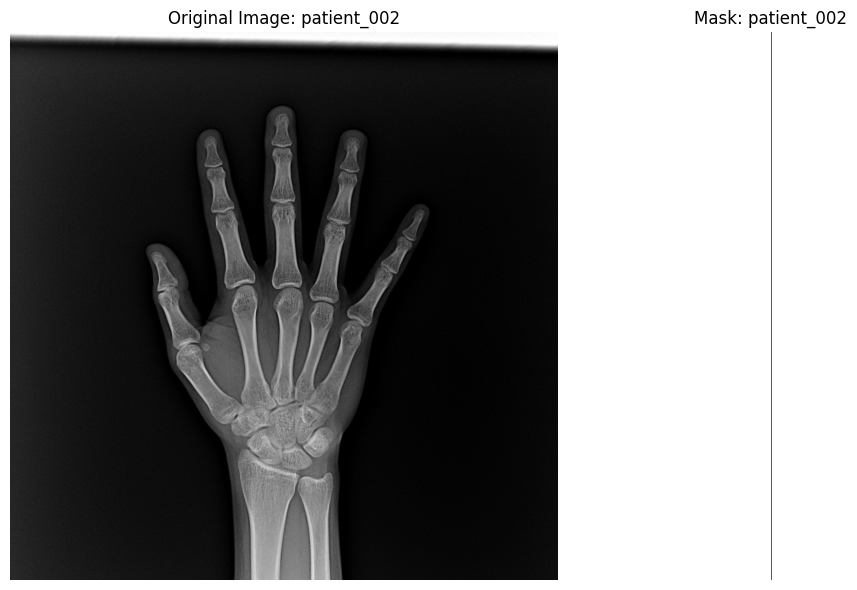

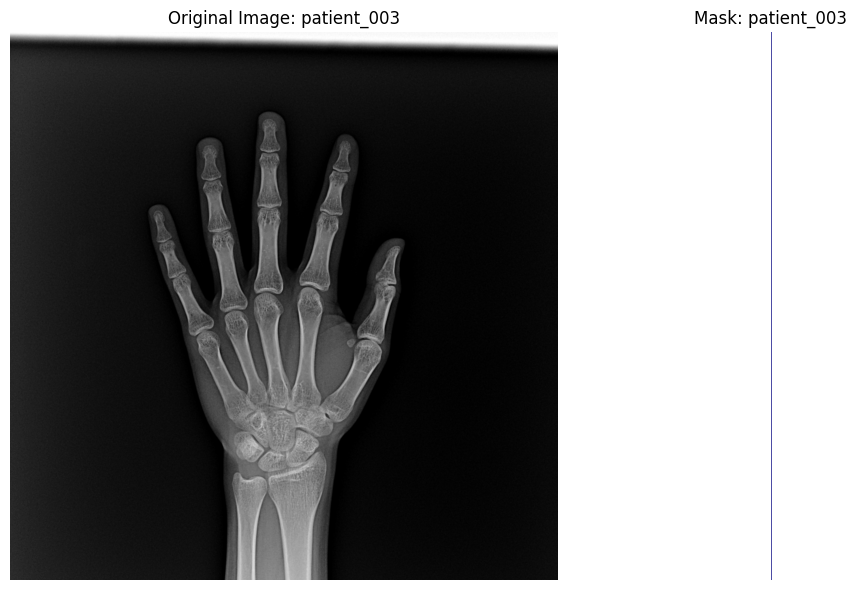

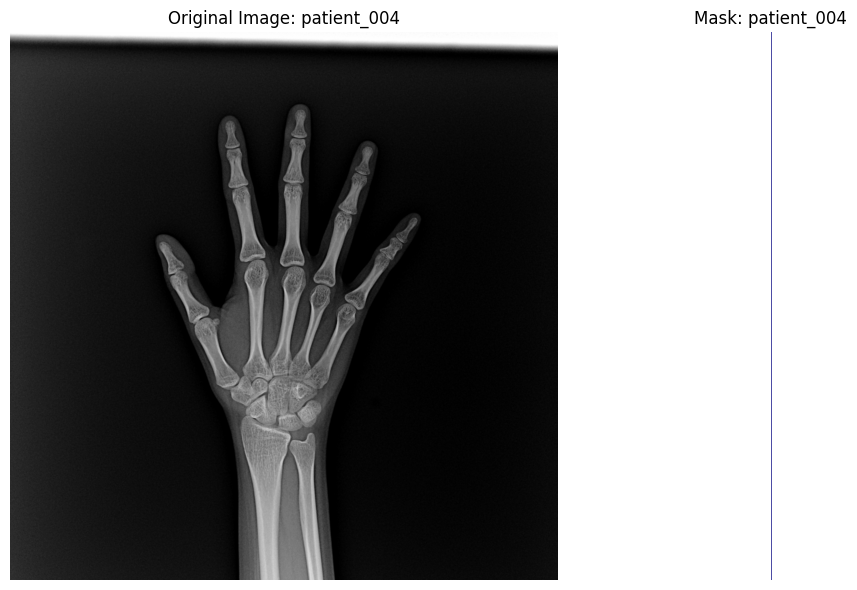

In [32]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image

# 경로 설정
image_folder = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTr"  # 원본 이미지 폴더
nifti_folder = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr"  # 라벨 NIfTI 파일 폴더
visualize_range = range(0, 5)  # 시각화할 파일 번호 범위 (000~010)

def visualize_images_and_masks(image_folder, nifti_folder, visualize_range):
    """
    지정된 범위의 이미지 및 마스크를 시각화.

    Parameters:
        image_folder (str): 원본 이미지가 저장된 폴더 경로.
        nifti_folder (str): NIfTI 파일이 저장된 폴더 경로.
        visualize_range (range): 시각화할 파일 번호 범위.
    """
    for idx in visualize_range:
        # 파일 이름 생성
        image_filename = f"case_{idx:04d}_0000.nii.gz"  # nnUNet 이미지 파일 형식
        nifti_filename = f"case_{idx:04d}_0000.nii.gz"  # 라벨 파일 형식
        image_path = os.path.join(image_folder, image_filename)
        nifti_path = os.path.join(nifti_folder, nifti_filename)

        # 파일 존재 여부 확인
        if not os.path.exists(image_path) or not os.path.exists(nifti_path):
            print(f"이미지 또는 라벨 파일이 누락되었습니다: {image_filename} 또는 {nifti_filename}")
            continue

        # 원본 이미지 로드 (NIfTI)
        sitk_image = sitk.ReadImage(image_path)
        image_array = sitk.GetArrayFromImage(sitk_image)
        if image_array.ndim == 3:  # 3D 데이터라면 첫 번째 슬라이스 선택
            image_slice = image_array[0]
        else:
            image_slice = image_array

        # 마스크 로드 (NIfTI)
        sitk_mask = sitk.ReadImage(nifti_path)
        mask_array = sitk.GetArrayFromImage(sitk_mask)
        if mask_array.ndim == 3:  # 3D 데이터라면 첫 번째 슬라이스 선택
            mask_slice = mask_array[0]
        else:
            mask_slice = mask_array

        # 시각화
        plt.figure(figsize=(12, 6))

        # 원본 이미지 시각화
        plt.subplot(1, 2, 1)
        plt.imshow(image_slice, cmap="gray")
        plt.title(f"Original Image: patient_{idx:03d}")
        plt.axis("off")

        # 마스크 시각화 (컬러)
        plt.subplot(1, 2, 2)
        plt.imshow(mask_slice, cmap="jet", alpha=0.7)
        plt.title(f"Mask: patient_{idx:03d}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

# Main 실행
if __name__ == "__main__":
    visualize_images_and_masks(
        image_folder=image_folder,
        nifti_folder=nifti_folder,
        visualize_range=visualize_range,
    )


In [11]:
import os
import json

# Directory paths
imagesTr_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTr"
labelsTr_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr"
imagesTs_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTs"
output_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/dataset.json"

# Class names
class_names = [
    "background",  # Must always be 0
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Pisiform", "Triquetrum",
    "Radius", "Ulna"
]

# Basic dataset structure
dataset_info = {
    "channel_names": {
        "0": "CT"
    },
    "modality": {
        "0": "CT"
    },
    "labels": {str(i): name for i, name in enumerate(class_names)},  # Automatically add labels
    "numTraining": 800,  # Count automatically based on training files
    "file_ending": ".nii.gz",
    "overwrite_image_reader_writer": "SimpleITKIO",
    "training": [],
    "test": []  # Add test files here
}

# Generate the training list
def generate_training_list(imagesTr_dir, labelsTr_dir):
    training_list = []
    
    # Sort and match image and label files
    images = sorted(os.listdir(imagesTr_dir))
    labels = sorted(os.listdir(labelsTr_dir))
    
    for img, lbl in zip(images, labels):
        if img.endswith(".nii.gz") and lbl.endswith(".nii.gz"):
            img_path = os.path.join(imagesTr_dir, img)
            lbl_path = os.path.join(labelsTr_dir, lbl)
            training_list.append({
                "image": img_path,
                "label": lbl_path
            })
    return training_list

# Generate the test list
def generate_test_list(imagesTs_dir):
    test_list = []
    images = sorted(os.listdir(imagesTs_dir))
    for img in images:
        if img.endswith(".nii.gz"):
            test_list.append(os.path.join(imagesTs_dir, img))
    return test_list

# Create the dataset.json file
def create_dataset_json(imagesTr_dir, labelsTr_dir, imagesTs_dir, output_path):
    training_list = generate_training_list(imagesTr_dir, labelsTr_dir)
    test_list = generate_test_list(imagesTs_dir)
    
    dataset_info["training"] = training_list
    dataset_info["test"] = test_list
    dataset_info["numTraining"] = len(training_list)  # Automatically count training files

    # Save as JSON
    with open(output_path, "w") as f:
        json.dump(dataset_info, f, indent=4)
    print(f"dataset.json created at: {output_path}")

# Main execution
if __name__ == "__main__":
    create_dataset_json(imagesTr_dir, labelsTr_dir, imagesTs_dir, output_path)


dataset.json created at: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/dataset.json


In [ ]:
import os
import json

# Directory paths
imagesTr_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTr"
labelsTr_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr"
imagesTs_dir = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTs"
output_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/dataset.json"

# Class names
class_names = [
    "background",  # Must always be 0
    "finger-1", "finger-2", "finger-3", "finger-4", "finger-5",
    "finger-6", "finger-7", "finger-8", "finger-9", "finger-10",
    "finger-11", "finger-12", "finger-13", "finger-14", "finger-15",
    "finger-16", "finger-17", "finger-18", "finger-19",
    "Trapezium", "Trapezoid", "Capitate", "Hamate",
    "Scaphoid", "Lunate", "Pisiform", "Triquetrum",
    "Radius", "Ulna"
]

# Basic dataset structure
dataset_info = {
    "channel_names": {
        "0": "CT"
    },
    "modality": {
        "0": "CT"
    },
    "labels": {str(i): name for i, name in enumerate(class_names)},  # Automatically add labels
    "numTraining": 800,  # Count automatically based on training files
    "file_ending": ".nii.gz",
    "overwrite_image_reader_writer": "SimpleITKIO",
    "training": [],
    "test": []  # Add test files here
}

# Generate the training list
def generate_training_list(imagesTr_dir, labelsTr_dir):
    training_list = []

    # Sort and match image and label files
    images = sorted(os.listdir(imagesTr_dir))
    labels = sorted(os.listdir(labelsTr_dir))

    for img, lbl in zip(images, labels):
        if img.endswith(".nii.gz") and lbl.endswith(".nii.gz"):
            img_path = os.path.join(imagesTr_dir, img)
            lbl_path = os.path.join(labelsTr_dir, lbl)

            # Add '_0000' to the image and label paths for nnUNet compatibility
            img_path_with_suffix = img_path.replace(".nii.gz", ".nii.gz")
            lbl_path_with_suffix = lbl_path.replace(".nii.gz", ".nii.gz")

            training_list.append({
                "image": img_path_with_suffix,
                "label": lbl_path_with_suffix
            })
    return training_list

# Generate the test list
def generate_test_list(imagesTs_dir):
    test_list = []
    images = sorted(os.listdir(imagesTs_dir))
    for img in images:
        if img.endswith(".nii.gz"):
            # Add '_0000' to the image path for nnUNet compatibility
            img_path_with_suffix = os.path.join(imagesTs_dir, img).replace(".nii.gz", ".nii.gz")
            test_list.append(img_path_with_suffix)
    return test_list

# Create the dataset.json file
def create_dataset_json(imagesTr_dir, labelsTr_dir, imagesTs_dir, output_path):
    training_list = generate_training_list(imagesTr_dir, labelsTr_dir)
    test_list = generate_test_list(imagesTs_dir)

    dataset_info["training"] = training_list
    dataset_info["test"] = test_list
    dataset_info["numTraining"] = len(training_list)  # Automatically count training files

    # Save as JSON
    with open(output_path, "w") as f:
        json.dump(dataset_info, f, indent=4)
    print(f"dataset.json created at: {output_path}")

# Main execution
if __name__ == "__main__":
    create_dataset_json(imagesTr_dir, labelsTr_dir, imagesTs_dir, output_path)


dataset.json created at: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/dataset.json


In [33]:
import nibabel as nib

image_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/imagesTr/case_0000_0000.nii.gz"
label_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0000_0000.nii.gz"

image = nib.load(image_path)
label = nib.load(label_path)

print("Image shape:", image.shape)
print("Label shape:", label.shape)
print("Image orientation:", image.affine[:3, :3])
print("Label orientation:", label.affine[:3, :3])


Image shape: (2048, 2048, 1)
Label shape: (1, 2048, 2048)
Image orientation: [[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
Label orientation: [[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


In [6]:
import os

# Path to the folder containing the files
folder_path = "/data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr"

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the filename ends with "_0000.nii.gz"
    if filename.endswith("_0000.nii.gz"):
        # Generate the new filename by removing the last '_0000'
        new_filename = filename.replace("_0000.nii.gz", ".nii.gz")
        
        # Full paths
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_filename)
        
        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed: {old_file} -> {new_file}")

print("All files have been renamed.")


Renamed: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0684_0000.nii.gz -> /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0684.nii.gz
Renamed: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0624_0000.nii.gz -> /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0624.nii.gz
Renamed: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0251_0000.nii.gz -> /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0251.nii.gz
Renamed: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0708_0000.nii.gz -> /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0708.nii.gz
Renamed: /data/ephemeral/home/nnUNet_raw_data_base/nnUNet_raw_data/Task001_HandBone/labelsTr/case_0276_0000.nii.gz -> /data/